In [21]:
from dotenv import load_dotenv
load_dotenv()

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [3]:
from langchain.chat_models import ChatOpenAI

In [11]:
llm = ChatOpenAI(model="gpt-4o-mini")  # You can also use "gpt-4" if you have access

#llm.invoke("Hello, how are you?")

Note: The required packages `python-dotenv`, `openai`, and `langchain` need to be installed first. The installation cell is added at the beginning of the notebook.

In [22]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

def chatbot(state:State)->State:
    return {"messages":[llm.invoke(state["messages"])]}

In [23]:
builder=StateGraph(State)
builder.add_node("chatbot_node",chatbot)

builder.add_edge(START,"chatbot_node")
builder.add_edge("chatbot_node",END)


In [24]:
graph=builder.compile()

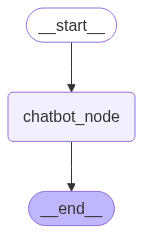

In [25]:
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
message={"role":"user","content":"Who was the first person to walk on the Moon?"}
response=graph.invoke({"messages":[message]})

response["messages"]

[HumanMessage(content='Who was the first person to walk on the Moon?', additional_kwargs={}, response_metadata={}, id='842d236a-25a8-40dd-9cc8-2ed21f62ef24'),
 AIMessage(content='The first person to walk on the Moon was Neil Armstrong. He took his historic step on July 20, 1969, during NASA\'s Apollo 11 mission. Armstrong famously described the moment as "one small step for [a] man, one giant leap for mankind."', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 18, 'total_tokens': 74, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini', 'system_fingerprint': 'fp_34a54ae93c', 'finish_reason': 'stop', 'logprobs': None}, id='run--5174b4f6-09e8-40ba-adf1-c55c5b470167-0')]

In [31]:
state=None
while True:
    in_message=input("Enter your message: ")
    if in_message.lower() in {"quit","exit"}:
        break
    if state is None:
        state: State={
            "messages":[{"role":"user","content":in_message}]
        }
    else:
        state["messages"].append({"role":"user","content":in_message})

    state=graph.invoke(state)
    print("Yash's Agent:", state["messages"][-1].content)


Yash's Agent: The value of π (pi) is approximately 3.14159. It is a mathematical constant representing the ratio of a circle's circumference to its diameter. Pi is an irrational number, meaning it has an infinite number of non-repeating decimal places. In many calculations, it is often rounded to 3.14 or expressed as a fraction, such as 22/7, although 22/7 is only an approximation.
Yash's Agent: Thank you for asking! As an AI, I don't have feelings or experiences, but I'm here and ready to assist you. How can I help you today?
Yash's Agent: The value of π (pi) is approximately 3.14159. It represents the ratio of the circumference of a circle to its diameter. Pi is an irrational number, which means it has an infinite number of non-repeating decimal places. It is commonly used in mathematics and engineering. If you need more specific information or applications regarding pi, feel free to ask!
